In [46]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install skyfield


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
csv = pd.read_csv("log_tinygs.csv", sep=";")
datetime3 = pd.to_datetime(csv['TOA (UTC+3)'])
datetime0 = pd.to_datetime(csv['TOA (UTC+0)'])
illuminated = csv['Illuminated'].astype('bool')
rtc = csv['RTC']
print(rtc)

0        69020
1        69020
2        69020
3        69075
4        69075
         ...  
4487    191699
4488    191709
4489    191729
4490    191754
4491    191789
Name: RTC, Length: 4492, dtype: int64


(844, 1921, 0, 30375)


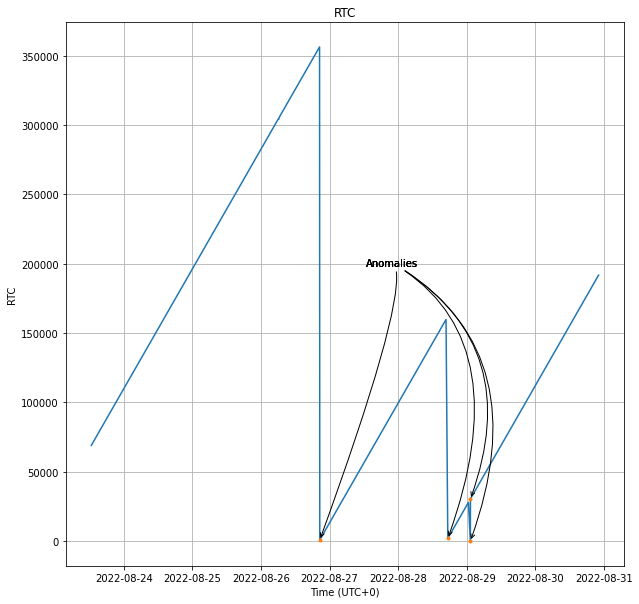

In [290]:
plt.figure(figsize=(10,10))
plt.plot(datetime0, rtc)
plt.title("RTC")
plt.xlabel("Time (UTC+0)")
plt.ylabel("RTC")
plt.grid(True)
time_anomalies, anomalies = zip(*[x for i, x in enumerate(zip(datetime0, rtc)) if np.abs(rtc.diff()[i]) > 20000])
print(anomalies)
plt.plot(time_anomalies, anomalies, '.')
for t, a in zip(time_anomalies, anomalies):
    plt.annotate("Anomalies", (t, a), xytext=(300, 300), textcoords='axes points',  arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=-30,angleB=70"))
plt.savefig("RTC.png")

Polytech_Universe-1 catalog #53371 epoch 2022-08-28 11:50:12 UTC
CalendarTuple(year=2022, month=8, day=28, hour=16, minute=50, second=4.0)
Latitude: -1.5018035923572293
Longitude: 92.4190218974116


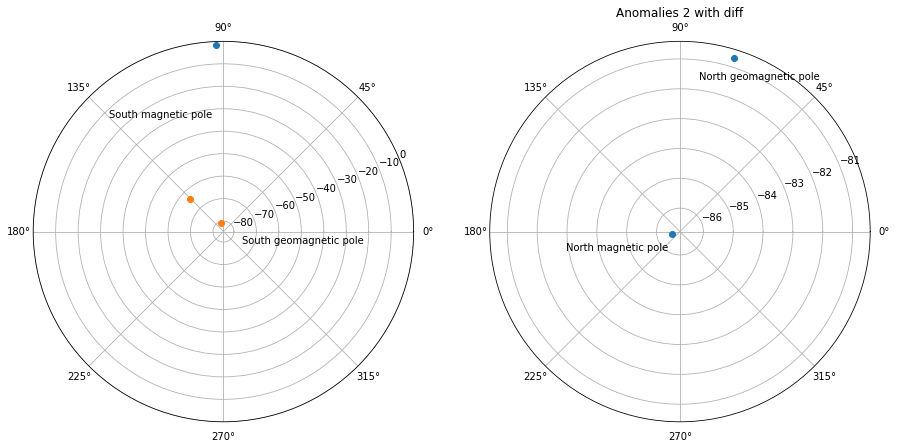

In [343]:

#For first anomaly
#1 53371U 22096B   22238.45751998  .00002996  00000-0  12493-3 0  9991
#2 53371  97.4359 139.7954 0003281 106.3324   8.1006 15.24465536  2636

#For second anomaly
#1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992
#2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940

from skyfield.api import load, wgs84, EarthSatellite
from skyfield.timelib import utc

ts = load.timescale()
line1 = '1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992'
line2 = '2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940'
satellite = EarthSatellite(line1, line2, 'Polytech_Universe-1', ts)
print(satellite)
t = ts.from_datetime(pd.Timestamp(time_anomalies[1].timestamp() - anomalies[1], unit='s').replace(tzinfo=utc))
geocentric = satellite.at(t)
lat, lon = wgs84.latlon_of(geocentric)
print(t.utc)
print('Latitude:', lat.degrees)
print('Longitude:', lon.degrees)

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1, 2, 1, projection='polar')
ax.plot(lon.radians, lat.degrees, 'o')

ax.plot([135.866 / 180 * np.pi, 107.3 / 180 * np.pi], [-64.081, -80.7], 'o')
plt.annotate("South geomagnetic pole", (107.3 / 180 * np.pi, -80.7), xytext=(0.55, 0.47), textcoords='axes fraction')
plt.annotate("South magnetic pole", (135.866 / 180 * np.pi, -64.081), xytext=(0.2, 0.8), textcoords='axes fraction')

ax = plt.subplot(1, 2, 2, projection='polar')
#ax.plot(lon.radians, -lat.degrees, 'o')
ax.plot([72.7 / 180 * np.pi, -162.867 / 180 * np.pi], [-80.7, -86.494], 'o')
plt.annotate("North geomagnetic pole", (72.7 / 180 * np.pi, -80.7), xytext=(0.55, 0.9), textcoords='axes fraction')
plt.annotate("North magnetic pole", (-162.867 / 180 * np.pi, -86.494), xytext=(0.2, 0.45), textcoords='axes fraction')

plt.title("Anomalies 2 with diff")
plt.savefig("Anomalies_place.png")

In [320]:
print(time_anomalies[1].timestamp())
print(time_anomalies[1])
print(pd.Timestamp(time_anomalies[1].timestamp() - anomalies[1], unit='s'))


1661707325.0
2022-08-28 17:22:05
2022-08-28 16:50:04
